In [1]:
import sys, os
import serial
import time
import numpy as np
import matplotlib.pyplot as plt
from threading import Thread
import nbimporter
from picoammeter_control import (
    send_cmd,
    query,
    init_cmds
)
sys.path.insert(0, os.path.abspath('.'))
sys.path.insert(0, os.path.abspath('filter_wheel_control'))
from filter_wheel_control.wheel_controller import (
    list_devices,
    open_device,
    get_position,
    get_position_count,
    set_position,
    close_device
)

In [12]:
print("Finding filter wheel devices...")
devices = list_devices()
if not devices:
    print("No filter wheel devices found.")
    sys.exit(1)

print("Found devices:")
for idx, dev in enumerate(devices):
    print(f" [{idx}] {dev}")


# init filter wheels to empty pos
for i in range(len(devices)):
    handle = open_device(devices[i])
    max_pos = get_position_count(handle)
    print(max_pos)
    if max_pos > 1:
        set_position(handle, 1)
        if max_pos == 6:
            wheel6_port = i
        elif max_pos == 12:
            wheel12_port = i
    close_device(handle)

Finding filter wheel devices...
Found devices:
 [0] COM5
 [1] COM6
 [2] COM4
-1
6
1
12
1


In [13]:
# Open serial connection
ser = serial.Serial(
    port='COM5',         # Replace with your actual port
    baudrate=9600,
    bytesize=serial.EIGHTBITS,
    parity=serial.PARITY_NONE,
    stopbits=serial.STOPBITS_ONE,
    timeout=2,
    xonxoff=False,
    rtscts=False,
    dsrdtr=False
)

init_cmds(ser)

read_time = .5 # time in minutes to read for
num_of_reads = round(417*read_time)
readings = np.zeros(num_of_reads)

# Trigger a read and fetch result
for i in range(num_of_reads):
    time.sleep(0.004)
    current = query(ser,'READ?')
    readings[i] = current

ser.close()


switching filters
finished switching


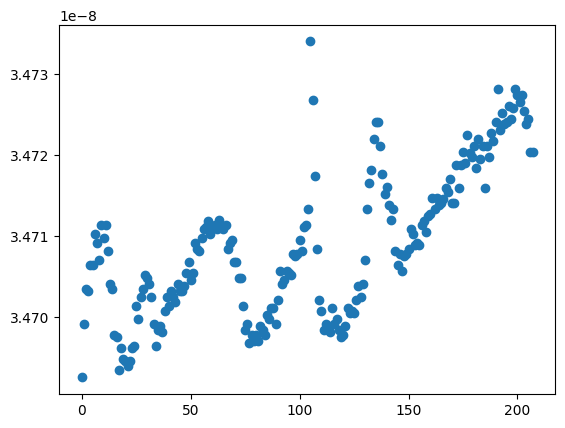

In [14]:
plt.scatter(range(num_of_reads), readings)
plt.show()
# print(f"mean: {np.mean(readings)}")

In [24]:
"""
from threading import Thread
import time

def func1():
    print('starting 1')
    # print(msg)
    time.sleep(10)
    print('finished 1')
def func2(msg):
    print("starting 2")
    time.sleep(5)
    print("halfway done 2")
    time.sleep(5)
    print("finished 2")

if __name__ == '__main__':
    Thread(target = func1).start()
    Thread(target = func2('hi')).start()
"""

starting 1
starting 2
halfway done 2
finished 1finished 2

